In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from adspy_shared_utilities import plot_fruit_knn

Reading the data

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Create Test Train Split to create a training and a testing dataset from a single dataset.

In [5]:
x = fruits[['mass','width','height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)

Create a visualisation of the data to get to know which features or attributes of the data we can use to differentiate between objects. the more seperate the clusters are the better we can predict using those attributes.

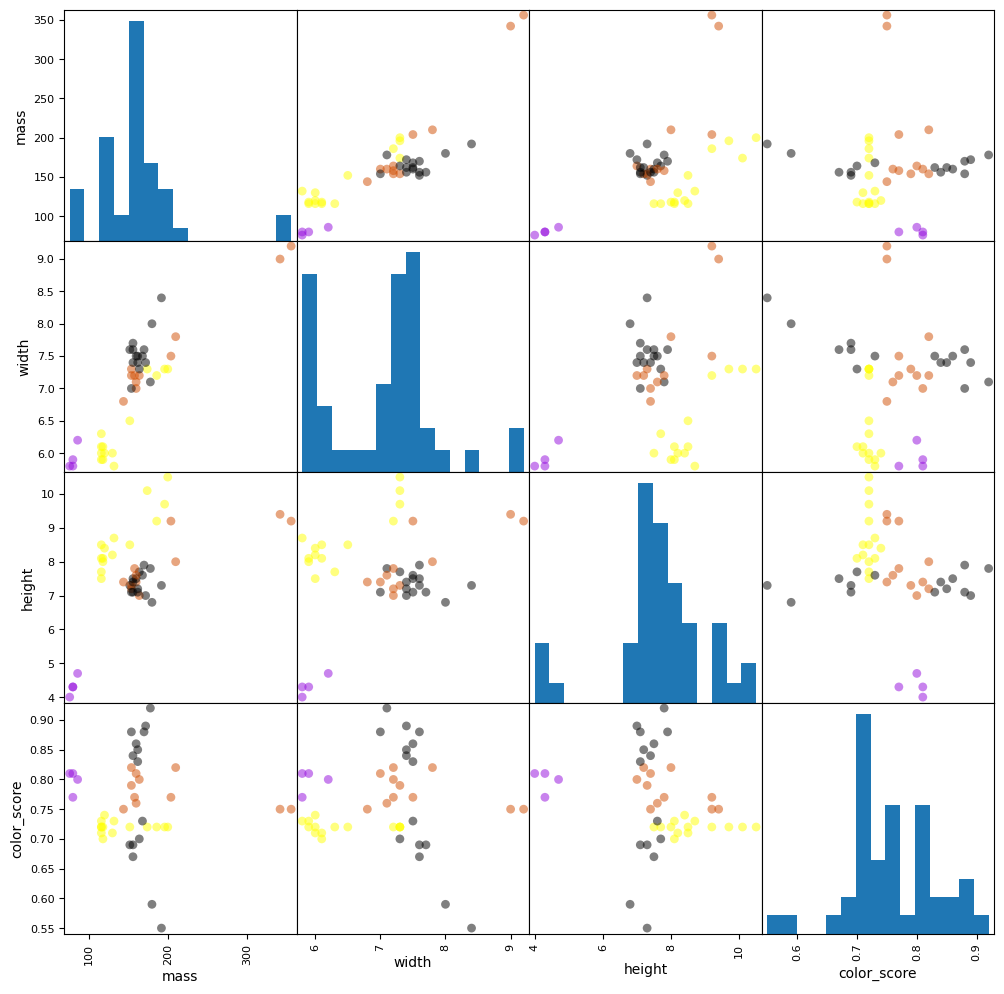

In [6]:
#from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)


3D representation of the data

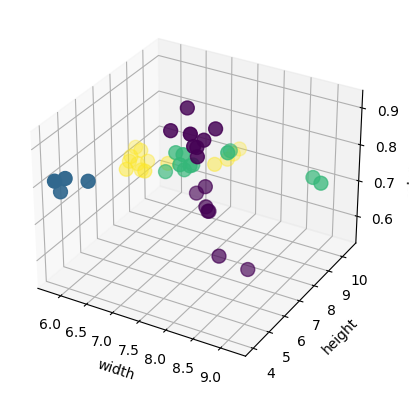

In [7]:
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['width'], X_train["height"], X_train['color_score'], c = y_train, marker = 'o', s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

# Create classifier object

In [8]:

#from sklearn.neighbors import KneighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

# Train the classifier using the training data

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Test Accuracy using the test set data items

In [10]:
knn.score(X_test, y_test)

0.5333333333333333

# use the model to classify new objects

In [11]:
fruit_prediction = knn.predict([[20,4.3,5.5,0.45]])
lookup_fruit_name[fruit_prediction[0]]

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [12]:
fruit_prediction = knn.predict([[100,6.3,8.5,0.85]])
lookup_fruit_name[fruit_prediction[0]]

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

# check descision boundaries (currently doesnt work)
the library imported is a python module kept with the code

In [13]:
#from adspy_shared_utilities import plot_fruit_knn
# change as_matrix to .values in imported module

#plot_fruit_knn(X_train, y_train, 5,'uniform')

TypeError: 'numpy.ndarray' object is not callable

# find out the best accuracy or find out the sensitivity of accuracy to the value of k

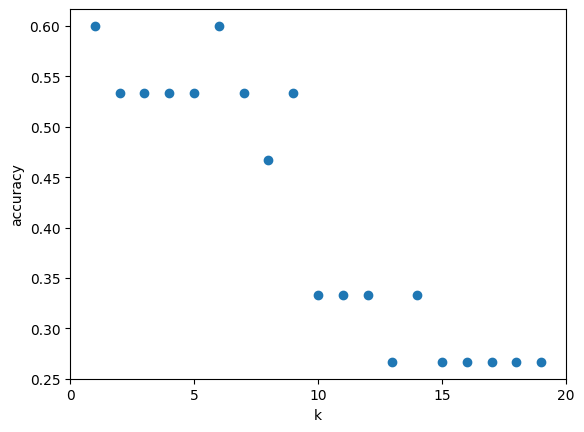

In [14]:
k_range = range(1,20)
scores=[]

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);